# 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。


virgicolorとvirginica  
sepal_lengthとpetal_length


In [500]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter("ignore")
iris = load_iris()
x0 = pd.DataFrame(iris.data,columns = 
                 ["sepal_length","sepal_width","petal_length","petal_width"])
y0 = pd.DataFrame(iris.target,columns = ["species"])
df = pd.concat([x0,y0],axis = 1)
df2 = df.drop(["sepal_width","petal_width"],axis = 1).drop(range(0,50))
df2.species = df2.species -1
df2.index = np.arange(100)
label = ["virgicolor","virginica"]
display(df2.head())

,sepal_length,petal_length,species
0,7.0,4.7,0
1,6.4,4.5,0
2,6.9,4.9,0
3,5.5,4.0,0
4,6.5,4.6,0


# 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。


ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

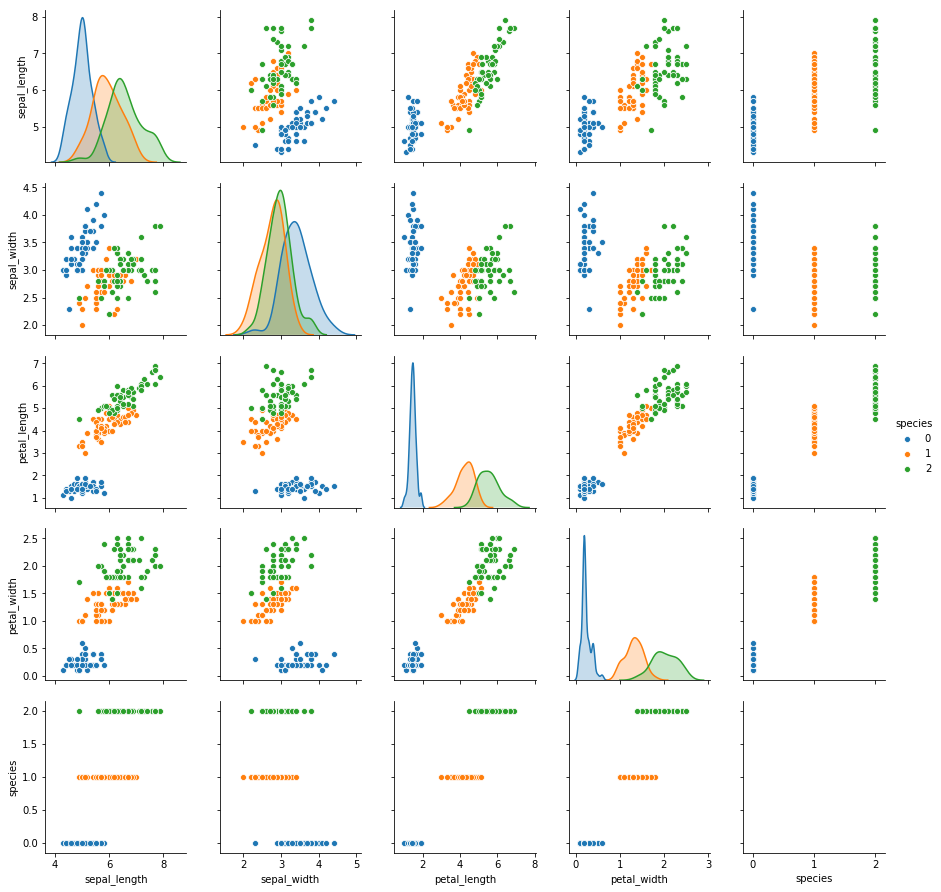

In [501]:
#散布図行列の確認
sns.pairplot(df,hue = "species")
plt.show()

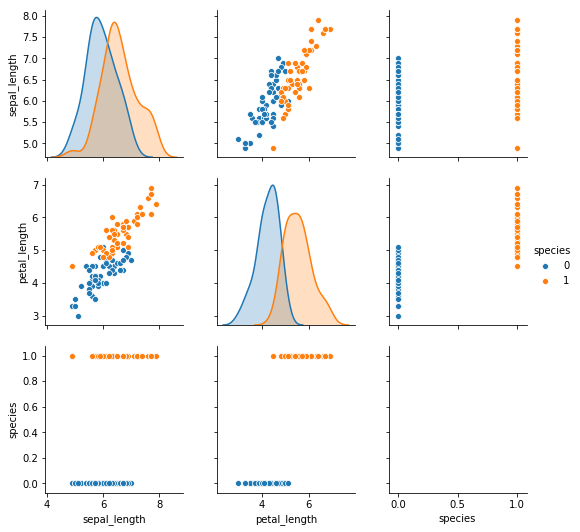

In [502]:
#散布図
sns.pairplot(df2,hue = "species")
plt.show()

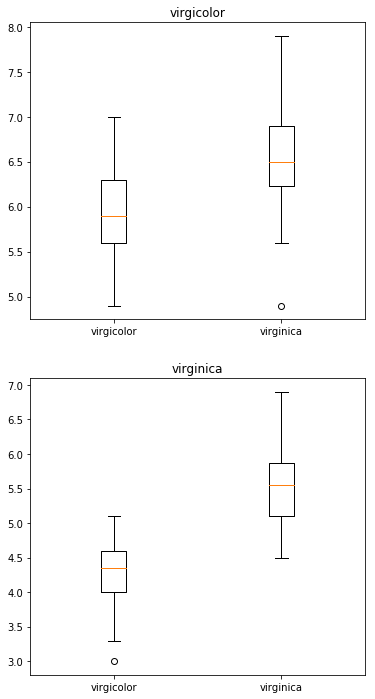

In [503]:
#箱ひげ図
fig,ax = plt.subplots(2,1,figsize = (6,12))
for i in range(2):
    ax[i].set_title(label[i])
    ax[i].boxplot([df2.iloc[:50,i],df2.iloc[50:,i]],labels = label)

plt.show()

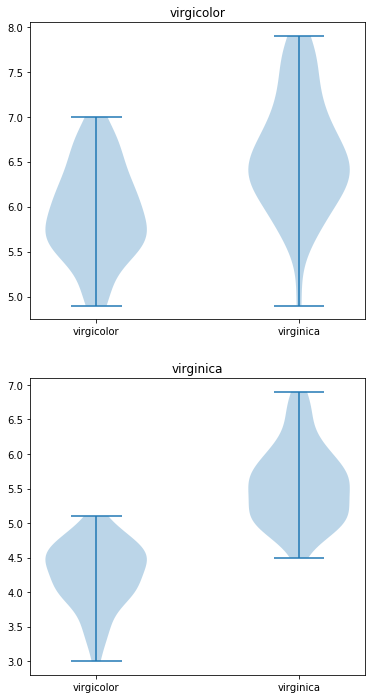

In [504]:
#バイオリン図
fig,ax = plt.subplots(2,1,figsize = (6,12))
for i in range(2):
    ax[i].set_title(label[i])
    ax[i].set_xticks([1,2])
    ax[i].set_xticklabels(label)    
    ax[i].violinplot([df2.iloc[:50,i],df2.iloc[50:,i]])
plt.show()

# 【問題3】前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。


scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。



In [505]:
X = np.array(df2.iloc[:,:-1])
y = np.array(df2.species)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

# 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。  
標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。



In [506]:
scaler = StandardScaler()
scaler.fit(x_train)
x_std = scaler.transform(x_train)  #scaler.fit_transform(x_train)で１行でも書ける
x_std2 = scaler.fit_transform(x_test)  #テスト用データの標準化も忘れずに行う

# 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。  
学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。  
パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [507]:
#1-nnから75-nnまで格納
y_pred = np.arange((x_std.shape[0]+1)*(len(x_test))).reshape(x_std.shape[0]+1,len(x_test))

for i in range(1,(x_std.shape[0]+1)):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_std,y_train)
    y_pred[i] = knn.predict(x_std2)

# 【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。  
2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。  
scikit-learnを使い4種類の指標を計算する  
混同行列をscikit-learnを使い表示する  
4種類の指標値の意味について簡単に調査して文章でまとめる

In [508]:
#75-nnまで確認できる
k = 5
for i in range(1,k+1):
    print("{}-nnのAccuracy(正解率)：{}".format(i,accuracy_score(y_test,y_pred[i])))
    print("{}-nnのPrecision(適合率)：{}".format(i,precision_score(y_test,y_pred[i])))
    print("{}-nnのRecall(再現率)：{}".format(i,recall_score(y_test,y_pred[i])))
    print("{}-nnのF値：{}".format(i,f1_score(y_test,y_pred[i])))
    print("\n混同行列：\n{}".format(confusion_matrix(y_test,y_pred[i])))
    print("ーーーーーーーーーーーーーーー")

1-nnのAccuracy(正解率)：0.88
1-nnのPrecision(適合率)：0.8181818181818182
1-nnのRecall(再現率)：0.9
1-nnのF値：0.8571428571428572

混同行列：
[[13  2]
 [ 1  9]]
ーーーーーーーーーーーーーーー
2-nnのAccuracy(正解率)：0.84
2-nnのPrecision(適合率)：0.8
2-nnのRecall(再現率)：0.8
2-nnのF値：0.8000000000000002

混同行列：
[[13  2]
 [ 2  8]]
ーーーーーーーーーーーーーーー
3-nnのAccuracy(正解率)：0.92
3-nnのPrecision(適合率)：0.8333333333333334
3-nnのRecall(再現率)：1.0
3-nnのF値：0.9090909090909091

混同行列：
[[13  2]
 [ 0 10]]
ーーーーーーーーーーーーーーー
4-nnのAccuracy(正解率)：0.88
4-nnのPrecision(適合率)：0.8888888888888888
4-nnのRecall(再現率)：0.8
4-nnのF値：0.8421052631578948

混同行列：
[[14  1]
 [ 2  8]]
ーーーーーーーーーーーーーーー
5-nnのAccuracy(正解率)：0.92
5-nnのPrecision(適合率)：0.8333333333333334
5-nnのRecall(再現率)：1.0
5-nnのF値：0.9090909090909091

混同行列：
[[13  2]
 [ 0 10]]
ーーーーーーーーーーーーーーー


ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー
Accuracy（正解率）:予測結果全体と、答えがどれぐらい一致しているかを判断する指標
$$
Accuracy = \displaystyle\frac{TP+TN}{TP+FP+FN+TN}
$$

Precision（適合率）:正事例と予測したもののなかで真の値が正事例の割合を表す指標
$$
Precision = \displaystyle\frac{TP}{TP+FP}
$$

Recall（再現率）:再現率とは、真の値が正事例のもののなかで正事例と予測した割合を表す指標
$$
Recall = \displaystyle\frac{TP}{TP + FN}
$$

F値:適合率と再現率の調和平均
$$
F – measure = \displaystyle\frac{2Precision * Recall}{Precision + Recall}
$$

True Positive(TP) ・・・真の値が正事例のものに対して、正事例と予測したもの (真陽性)

False Positive(FP) ・・・真の値が負事例のものに対して、正事例と予測したもの(偽陽性)

False Negative(FN) ・・・真の値が正事例のものに対して、負事例と予測したもの(偽陰性)

True Negative(TN) ・・・真の値が負事例のものに対して、負事例と予測したもの(真陰性)

# 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。  
以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [509]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

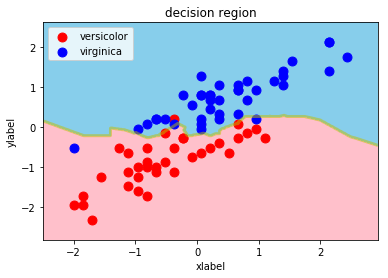

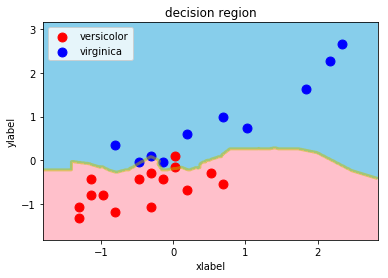

In [510]:
k = 5

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_std,y_train)

#y_pred2 = knn.predict(x_std)
#y_pred3 = knn.predict(x_std2)
decision_region(x_std,y_train,knn)  #訓練用データの決定領域
decision_region(x_std2,y_test,knn)  #テスト用データの決定領域

# 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。


最近傍法  
ロジスティック回帰  
SVM  
決定木  
ランダムフォレスト

In [531]:
values = np.empty(20).reshape(5,4)
values2 = np.empty(20).reshape(5,4)

Accuracy(正解率)：0.88
Precision(適合率)：0.8181818181818182
Recall(再現率)：0.9
F値：0.8571428571428572

混同行列：
[[13  2]
 [ 1  9]]


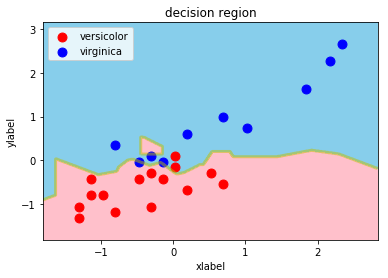

In [540]:
#最近傍法(k=1のk近傍法)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_std,y_train)
y_pred_m = knn.predict(x_std2)
values[0,:] = accuracy_score(y_test,y_pred_m),precision_score(y_test,y_pred_m),recall_score(y_test,y_pred_m),f1_score(y_test,y_pred_m)
print("Accuracy(正解率)：{}".format(values[0,0]))
print("Precision(適合率)：{}".format(values[0,1]))
print("Recall(再現率)：{}".format(values[0,2]))
print("F値：{}".format(values[0,3]))
print("\n混同行列：\n{}".format(confusion_matrix(y_test,y_pred_m)))
decision_region(x_std2,y_test,knn)


Accuracy(正解率)：0.96
Precision(適合率)：0.9090909090909091
Recall(再現率)：1.0
F値：0.9523809523809523

混同行列：
[[14  1]
 [ 0 10]]


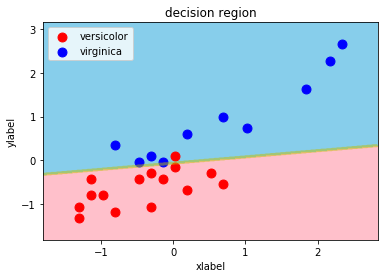

In [541]:
#ロジスティック回帰
lr = LogisticRegression()
lr.fit(x_std,y_train)
y_pred_l = lr.predict(x_std2)
values[1,:] = accuracy_score(y_test,y_pred_l),precision_score(y_test,y_pred_l),recall_score(y_test,y_pred_l),f1_score(y_test,y_pred_l)
print("Accuracy(正解率)：{}".format(values[1,0]))
print("Precision(適合率)：{}".format(values[1,1]))
print("Recall(再現率)：{}".format(values[1,2]))
print("F値：{}".format(values[1,3]))
print("\n混同行列：\n{}".format(confusion_matrix(y_test,y_pred_l)))
decision_region(x_std2,y_test,lr)

Accuracy(正解率)：0.96
Precision(適合率)：0.9090909090909091
Recall(再現率)：1.0
F値：0.9523809523809523

混同行列：
[[14  1]
 [ 0 10]]


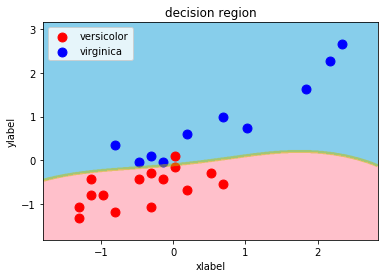

In [542]:
#SVM
svm = SVC()
svm.fit(x_std,y_train)
y_pred_s  =svc.predict(x_std2)
values[2,:] = accuracy_score(y_test,y_pred_s),precision_score(y_test,y_pred_s),recall_score(y_test,y_pred_s),f1_score(y_test,y_pred_s)
print("Accuracy(正解率)：{}".format(values[2,0]))
print("Precision(適合率)：{}".format(values[2,1]))
print("Recall(再現率)：{}".format(values[2,2]))
print("F値：{}".format(values[2,3]))
print("\n混同行列：\n{}".format(confusion_matrix(y_test,y_pred_s)))
decision_region(x_std2,y_test,svc)

Accuracy(正解率)：0.96
Precision(適合率)：0.9090909090909091
Recall(再現率)：1.0
F値：0.9523809523809523

混同行列：
[[14  1]
 [ 0 10]]


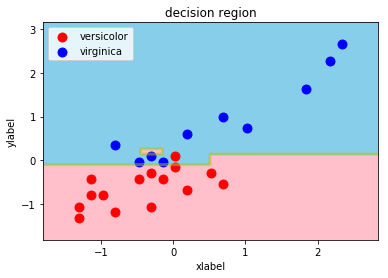

In [543]:
#決定木
dt = DecisionTreeClassifier()
dt.fit(x_std,y_train)
y_pred_d  = dt.predict(x_std2)
values[3,:] = accuracy_score(y_test,y_pred_d),precision_score(y_test,y_pred_d),recall_score(y_test,y_pred_d),f1_score(y_test,y_pred_d)
print("Accuracy(正解率)：{}".format(values[3,0]))
print("Precision(適合率)：{}".format(values[3,1]))
print("Recall(再現率)：{}".format(values[3,2]))
print("F値：{}".format(values[3,3]))
print("\n混同行列：\n{}".format(confusion_matrix(y_test,y_pred_d)))
decision_region(x_std2,y_test,dt)

Accuracy(正解率)：0.96
Precision(適合率)：0.9090909090909091
Recall(再現率)：1.0
F値：0.9523809523809523

混同行列：
[[14  1]
 [ 0 10]]


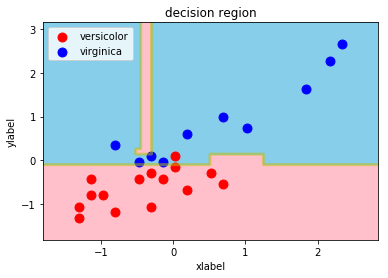

In [544]:
#ランダムフォレスト
rf = RandomForestClassifier()
rf.fit(x_std,y_train)
y_pred_r = rf.predict(x_std2)
values[4,:] = accuracy_score(y_test,y_pred_r),precision_score(y_test,y_pred_r),recall_score(y_test,y_pred_r),f1_score(y_test,y_pred_r)
print("Accuracy(正解率)：{}".format(values[4,0]))
print("Precision(適合率)：{}".format(values[4,1]))
print("Recall(再現率)：{}".format(values[4,2]))
print("F値：{}".format(values[4,3]))
print("\n混同行列：\n{}".format(confusion_matrix(y_test,y_pred_r)))
decision_region(x_std2,y_test,rf)

In [545]:
pd.DataFrame(values,index = ["最近傍法","ロジスティック回帰","SVM","決定木","ランダムフォレスト"],columns = ["Accuracy","Precision","Recall","F値"])

,Accuracy,Precision,Recall,F値
最近傍法,0.88,0.818182,0.9,0.857143
ロジスティック回帰,0.96,0.909091,1.0,0.952381
SVM,0.96,0.909091,1.0,0.952381
決定木,0.96,0.909091,1.0,0.952381
ランダムフォレスト,0.96,0.909091,1.0,0.952381


[考察]  
今回用いたデータは分類しやすいデータだったためどの手法を使っても高確率で正しく2値分類できた。最近傍法以外ははかなり正確に分類できていた。最も正解率が低い最近傍法も９割近い正解率であった。

# 【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

Accuracy(正解率)：0.88
Precision(適合率)：0.8181818181818182
Recall(再現率)：0.9
F値：0.8571428571428572

混同行列：
[[13  2]
 [ 1  9]]


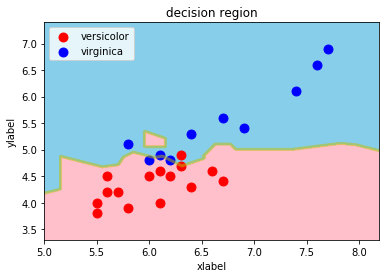

In [546]:
#最近傍法(k=1のk近傍法)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
y_pred_m = knn.predict(x_test)
values2[0,:] = accuracy_score(y_test,y_pred_m),precision_score(y_test,y_pred_m),recall_score(y_test,y_pred_m),f1_score(y_test,y_pred_m)
print("Accuracy(正解率)：{}".format(values2[0,0]))
print("Precision(適合率)：{}".format(values2[0,1]))
print("Recall(再現率)：{}".format(values2[0,2]))
print("F値：{}".format(values2[0,3]))
print("\n混同行列：\n{}".format(confusion_matrix(y_test,y_pred_m)))
decision_region(x_test,y_test,knn)


Accuracy(正解率)：0.88
Precision(適合率)：0.8181818181818182
Recall(再現率)：0.9
F値：0.8571428571428572

混同行列：
[[13  2]
 [ 1  9]]


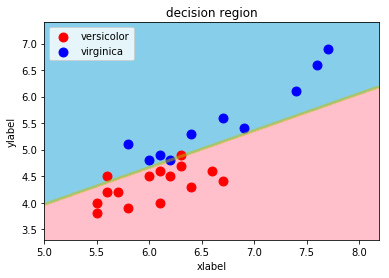

In [547]:
#ロジスティック回帰
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_l = lr.predict(x_test)
values2[1,:] = accuracy_score(y_test,y_pred_l),precision_score(y_test,y_pred_l),recall_score(y_test,y_pred_l),f1_score(y_test,y_pred_l)
print("Accuracy(正解率)：{}".format(values2[1,0]))
print("Precision(適合率)：{}".format(values2[1,1]))
print("Recall(再現率)：{}".format(values2[1,2]))
print("F値：{}".format(values2[1,3]))
print("\n混同行列：\n{}".format(confusion_matrix(y_test,y_pred_l)))
decision_region(x_test,y_test,lr)

Accuracy(正解率)：0.4
Precision(適合率)：0.4
Recall(再現率)：1.0
F値：0.5714285714285715

混同行列：
[[ 0 15]
 [ 0 10]]


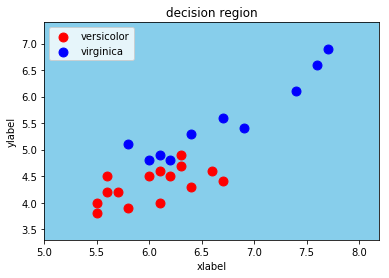

In [548]:
#SVM
svm = SVC()
svm.fit(x_train,y_train)
y_pred_s  =svc.predict(x_test)
values2[2,:] = accuracy_score(y_test,y_pred_s),precision_score(y_test,y_pred_s),recall_score(y_test,y_pred_s),f1_score(y_test,y_pred_s)
print("Accuracy(正解率)：{}".format(values2[2,0]))
print("Precision(適合率)：{}".format(values2[2,1]))
print("Recall(再現率)：{}".format(values2[2,2]))
print("F値：{}".format(values2[2,3]))
print("\n混同行列：\n{}".format(confusion_matrix(y_test,y_pred_s)))
decision_region(x_test,y_test,svc)

Accuracy(正解率)：0.88
Precision(適合率)：0.8888888888888888
Recall(再現率)：0.8
F値：0.8421052631578948

混同行列：
[[14  1]
 [ 2  8]]


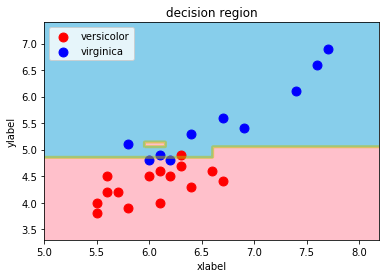

In [549]:
#決定木
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_d  = dt.predict(x_test)
values2[3,:] = accuracy_score(y_test,y_pred_d),precision_score(y_test,y_pred_d),recall_score(y_test,y_pred_d),f1_score(y_test,y_pred_d)
print("Accuracy(正解率)：{}".format(values2[3,0]))
print("Precision(適合率)：{}".format(values2[3,1]))
print("Recall(再現率)：{}".format(values2[3,2]))
print("F値：{}".format(values2[3,3]))
print("\n混同行列：\n{}".format(confusion_matrix(y_test,y_pred_d)))
decision_region(x_test,y_test,dt)

Accuracy(正解率)：0.88
Precision(適合率)：0.8888888888888888
Recall(再現率)：0.8
F値：0.8421052631578948

混同行列：
[[14  1]
 [ 2  8]]


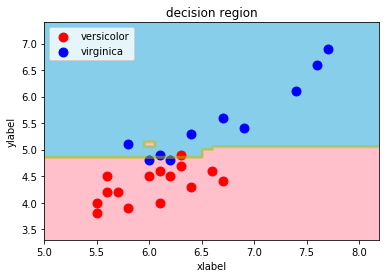

In [550]:
#ランダムフォレスト
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_r = rf.predict(x_test)
values2[4,:] = accuracy_score(y_test,y_pred_r),precision_score(y_test,y_pred_r),recall_score(y_test,y_pred_r),f1_score(y_test,y_pred_r)
print("Accuracy(正解率)：{}".format(values2[4,0]))
print("Precision(適合率)：{}".format(values2[4,1]))
print("Recall(再現率)：{}".format(values2[4,2]))
print("F値：{}".format(values2[4,3]))
print("\n混同行列：\n{}".format(confusion_matrix(y_test,y_pred_r)))
decision_region(x_test,y_test,rf)

In [551]:
pd.DataFrame(values2,index = ["最近傍法","ロジスティック回帰","SVM","決定木","ランダムフォレスト"],columns = ["Accuracy","Precision","Recall","F値"])

,Accuracy,Precision,Recall,F値
最近傍法,0.88,0.818182,0.9,0.857143
ロジスティック回帰,0.88,0.818182,0.9,0.857143
SVM,0.40,0.400000,1.0,0.571429
決定木,0.88,0.888889,0.8,0.842105
ランダムフォレスト,0.88,0.888889,0.8,0.842105


[考察]  
SVMは大きく数字が下がっている。他の手法も全体的に正確率が下がっている。このように、標準化しなければ取る手法によって結果に大きなばらつきが出てしまうことがわかる。